In [22]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import re

In [23]:
# index = pd.MultiIndex.from_product([nets, ['val_acc', 'adv_val_acc']])
# df = pd.DataFrame(columns=index, index=['Epoch'])

In [24]:
def add_multicolumn(df, df2, new_col_name):
    tmp = df2.copy()    # make copy, otherwise df2 will be changed !!!
    tmp.columns = pd.MultiIndex.from_product([[new_col_name], df2.columns.tolist()])
    return pd.concat([df, tmp], axis=1)

def get_valid_filename(s):
    s = str(s).strip().replace(' ', '_')
    return re.sub(r'(?u)[^-\w.]', '', s)

In [25]:
model_path = '/users/Stathis/GoogleDrive/MLP/'
nets =  list(filter(lambda x: os.path.isdir(os.path.join(model_path, x)), os.listdir(model_path)))
nets = [a for a in nets if 'resnet56' in a  or 'densenet121' in a]
nets.sort()

df = pd.DataFrame()
for net in nets:
    stats_path =  os.path.join(model_path, net) +'/result_outputs'
    data_train = pd.read_csv(stats_path+'/summary.csv', delimiter=",")
    
    if 'clean_val_acc' in data_train.columns:
        dftmp = data_train[['clean_val_acc', 'adv_val_acc']][:200]
    else:
        dftmp = data_train[['val_acc']][:200]
        dftmp.columns=['clean_val_acc']
    df = add_multicolumn(df, dftmp, net)

In [26]:
df.head()

densenet121_cifar10 densenet121_cifar100 densenet121_cifar100_fgsm  \
        clean_val_acc        clean_val_acc             clean_val_acc   
0              0.5444               0.1584                    0.1528   
1              0.6740               0.2588                    0.2620   
2              0.7172               0.3268                    0.3400   
3              0.7708               0.3844                    0.4224   
4              0.8076               0.4240                    0.4468   

              densenet121_cifar100_pgd             densenet121_cifar10_fgsm  \
  adv_val_acc            clean_val_acc adv_val_acc            clean_val_acc   
0      0.0672                   0.1540      0.0796                   0.5616   
1      0.1700                   0.2640      0.1560                   0.7084   
2      0.1936                   0.3532      0.2152                   0.7464   
3      0.2572                   0.3876      0.2124                   0.7844   
4      0.2820                   0.4308      0.2408                   0.8152   

              densenet121_cifar10_pgd                 ...      \
  adv_val_acc           clean_val_acc adv_val_acc     ...       
0      0.3896                  0.5700      0.4444     ...       
1      0.4960                  0.6784      0.4476     ...       
2      0.5436                  0.7500      0.5548     ...       
3      0.6168                  0.7752      0.4976     ...       
4      0.5796                  0.8056      0.5196     ...       

  transfer_resnet56_fgsm_fgsm transfer_resnet56_fgsm_nat  \
                  adv_val_acc              clean_val_acc   
0                      0.5532                     0.7588   
1                      0.5468                     0.8172   
2                      0.6076                     0.8148   
3                      0.5988                     0.8340   
4                      0.6472                     0.8284   

  transfer_resnet56_nat_fgsm             transfer_resnet56_nat_nat  \
               clean_val_acc adv_val_acc             clean_val_acc   
0                     0.7820      0.5112                    0.8160   
1                     0.8168      0.5740                    0.8264   
2                     0.8376      0.5824                    0.8436   
3                     0.8528      0.6060                    0.8608   
4                     0.8668      0.6176                    0.8600   

  transfer_resnet56_nat_pgd             transfer_resnet56_pgd_nat  \
              clean_val_acc adv_val_acc             clean_val_acc   
0                    0.7472      0.2992                    0.7776   
1                    0.7724      0.4084                    0.8140   
2                    0.8044      0.3304                    0.8140   
3                    0.8240      0.4216                    0.8344   
4                    0.8276      0.3980                    0.8228   

  transfer_resnet56_pgd_pgd              
              clean_val_acc adv_val_acc  
0                    0.7584      0.4144  
1                    0.7928      0.4556  
2                    0.8100      0.4432  
3                    0.8232      0.4764  
4                    0.8248      0.4904  

[5 rows x 74 columns]

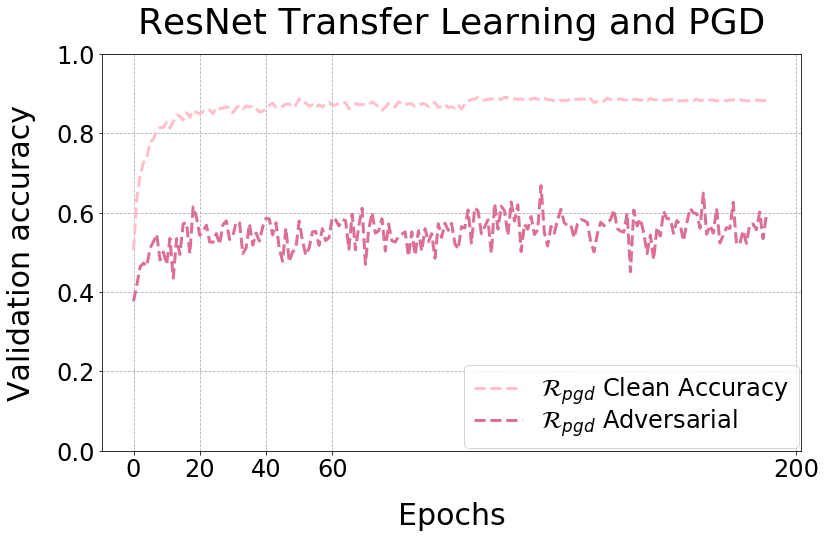

In [27]:
model = 'resnet56'
att = 'pgd'
what_to_plot = [
#                 ('transfer_%s_%s_%s' % (model, att,att) , 'clean_val_acc', '$\mathcal{R}_{%s-%s}$ Clean Accuracy' % (att, att), 
#                  {'color':'dodgerblue', 'linestyle':'-'}), 
#                 ('transfer_%s_%s_%s' % (model, att, att), 'adv_val_acc'  , '$\mathcal{R}_{%s-%s} Adversarial$' % (att,att), 
#                  {'color':'navy', 'linestyle':'-'}),
#                 ('transfer_%s_nat_%s' % (model, att), 'clean_val_acc', '$\mathcal{R}_{nat-%s}$ Clean Accuracy' % att, 
#                  {'color':'seagreen', 'linestyle':'-'}), 
#                 ('transfer_%s_nat_%s' % (model, att), 'adv_val_acc'  , '$\mathcal{R}_{nat-%s}$ Adversarial' % att,
#                  {'color':'darkgreen', 'linestyle':'-'}),
                ('%s_cifar10_%s' % (model,att), 'clean_val_acc'  , '$\mathcal{R}_{%s}$ Clean Accuracy' % att,
                 {'color':'pink', 'linestyle':'--'}),
                ('%s_cifar10_%s'% (model,att), 'adv_val_acc'  , '$\mathcal{R}_{%s}$ Adversarial' % att, 
                 {'color':'palevioletred', 'linestyle':'--'})
               ]

title = 'ResNet Transfer Learning and %s' % (att.upper())

scale=1.5
s=100*scale
ll=2.2
plt.rcParams.update({'font.size': 16*scale})
               
epoch=200
fig = plt.figure(figsize=(12,8))
for (net, acc, label, args) in what_to_plot:
    plt.plot(df[net][acc][:epoch], label=label, color=args['color'], linestyle=args['linestyle'], linewidth=3)

plt.xlabel('Epochs',fontdict={'size':20*scale}, labelpad=20)
plt.ylabel('Validation accuracy',fontdict={'size':20*scale}, labelpad=20)
plt.title(title,fontdict={'size':24*scale}, pad=20)
ax = plt.gca()
ax.yaxis.grid(True, linestyle='--')
ax.xaxis.grid(True, linestyle='--')
plt.xticks([0, 20, 40, 60, 200])
plt.ylim([0,1])
plt.legend(loc=4,fontsize=16*scale, labelspacing=0.01, borderaxespad=0.12)
plt.tight_layout()
plt.savefig('images/%s.pdf' % get_valid_filename(title))

plt.show()

In [35]:
df.idxmax()

densenet121_cifar10                                           clean_val_acc    114
densenet121_cifar100                                          clean_val_acc    109
densenet121_cifar100_fgsm                                     clean_val_acc    101
                                                              adv_val_acc      115
densenet121_cifar100_pgd                                      clean_val_acc    109
                                                              adv_val_acc      114
densenet121_cifar10_fgsm                                      clean_val_acc    166
                                                              adv_val_acc      109
densenet121_cifar10_pgd                                       clean_val_acc    113
                                                              adv_val_acc       95
resnet56_cifar10                                              clean_val_acc    111
resnet56_cifar100                                             clean_val_acc    120
resn